## Análise de Qualidade de Dados - Notas de Alunos da UFPI
 Este notebook tem como objetivo analisar a qualidade dos dados de notas de 40 alunos do curso de Ciência da Computação da UFPI. A análise de qualidade de dados é uma etapa crucial em qualquer projeto de ciência de dados, garantindo que os dados sejam confiáveis, completos, consistentes e precisos para análises futuras e modelagem.

## 1. Configuração Inicial e Carregamento dos Dados

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = 100

try:
    df = pd.read_csv('..\datasets\\notas_alunos.csv')
    print("Dataset 'notas_alunos.csv' carregado com sucesso!")
except FileNotFoundError:
    print("Erro: O arquivo 'notas_alunos.csv' não foi encontrado. Certifique-se de que ele está no mesmo diretório do notebook.")
    df = pd.DataFrame() # Cria um DataFrame vazio para evitar erros futuros

Dataset 'notas_alunos.csv' carregado com sucesso!


## 2. Visão Geral dos Dados

In [6]:
if not df.empty:
    print("Primeiras 5 linhas do DataFrame:")
    display(df.head())

    print("\nÚltimas 5 linhas do DataFrame:")
    display(df.tail())

    print("\nInformações gerais do DataFrame (tipos de dados e não-nulos):")
    df.info()

    print("\nDimensões do DataFrame (linhas, colunas):")
    print(df.shape)

    print("\nNomes das colunas:")
    print(df.columns.tolist())

    print("\nEstatísticas descritivas básicas:")
    display(df.describe().T)


Primeiras 5 linhas do DataFrame:


,AlunoID,Código,Disciplina,Unidade 1,Unidade 2,Unidade 3,Unidade 4,Unidade 5,Prova Final,Resultado,Faltas,Situação
0,1,DC/CCN061,PROCESSAMENTO DE LINGUAGEM NATURAL,"7,1","9,4","10,0",NaN,NaN,NaN,"8,8",10,AM
1,1,DC/CCN040,SEGURANÇA EM SISTEMAS,"9,3","8,5","8,1",NaN,NaN,NaN,"8,6",14,AM
2,1,DC/CCN038,SISTEMAS DISTRIBUÍDOS,"8,0","10,0","9,0",NaN,NaN,NaN,"9,0",14,AM
3,1,DC/CCN071,TÓPICOS EM ENGENHARIA DE SOFTWARE,"9,4","9,0","7,5",NaN,NaN,NaN,"8,6",12,AM
4,1,DC/CCN032,COMPUTAÇÃO GRÁFICA,"8,0","7,0","10,0",NaN,NaN,NaN,"8,3",10,AM



Últimas 5 linhas do DataFrame:


,AlunoID,Código,Disciplina,Unidade 1,Unidade 2,Unidade 3,Unidade 4,Unidade 5,Prova Final,Resultado,Faltas,Situação
1286,40,CLE/CCHL002,INGLÊS TÉCNICO E CIENTÍFICO,"8,9","6,0","6,1",NaN,NaN,"6,1","7,0",5,AM
1287,40,DC/CCN019,INTRODUÇÃO À LÓGICA,"1,8","3,9","0,2",NaN,NaN,NaN,"1,97",14,RN
1288,40,DFIL/CCHL009,INTRODUÇÃO À METODOLOGIA CIENTÍFICA,"9,3","2,4","1,8",NaN,NaN,"3,0","4,5",11,RF
1289,40,DC/CCN026,PROGRAMAÇÃO ESTRUTURADA,"2,6","5,5","9,9",NaN,NaN,"4,0","6,0",12,RF
1290,40,DC/CCN020,SEMINÁRIOS DE INTRODUÇÃO AO CURSO,"2,4",NaN,NaN,NaN,NaN,"2,4",7,RN,NaN



Informações gerais do DataFrame (tipos de dados e não-nulos):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1291 entries, 0 to 1290
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   AlunoID      1291 non-null   object
 1   Código       1291 non-null   object
 2   Disciplina   1291 non-null   object
 3   Unidade 1    1291 non-null   object
 4   Unidade 2    1264 non-null   object
 5   Unidade 3    1264 non-null   object
 6   Unidade 4    17 non-null     object
 7   Unidade 5    17 non-null     object
 8   Prova Final  559 non-null    object
 9   Resultado    1291 non-null   object
 10  Faltas       1291 non-null   object
 11  Situação     1251 non-null   object
dtypes: object(12)
memory usage: 121.2+ KB

Dimensões do DataFrame (linhas, colunas):
(1291, 12)

Nomes das colunas:
['AlunoID', 'Código', 'Disciplina', 'Unidade 1', 'Unidade 2', 'Unidade 3', 'Unidade 4', 'Unidade 5', 'Prova Final', 'Resultado', 'Faltas', 

,count,unique,top,freq
AlunoID,1291,41,3,50
Código,1291,75,DC/CCN026,43
Disciplina,1291,58,PROGRAMAÇÃO ESTRUTURADA,43
Unidade 1,1291,102,"10,0",109
Unidade 2,1264,102,"10,0",111
Unidade 3,1264,102,"10,0",152
Unidade 4,17,11,"10,0",4
Unidade 5,17,11,"10,0",4
Prova Final,559,120,"5,4",14
Resultado,1291,222,"10,0",53


## 3. Análise de Qualidade de Dados

### 3.1. Dados Ausentes (Missing Values)
A presença de dados ausentes pode impactar significativamente a análise e modelagem. Vamos identificar e quantificar esses valores.


### Contagem de valores ausentes por coluna:
AlunoID           0
Código            0
Disciplina        0
Unidade 1         0
Unidade 2        27
Unidade 3        27
Unidade 4      1274
Unidade 5      1274
Prova Final     732
Resultado         0
Faltas            0
Situação         40
dtype: int64

### Porcentagem de valores ausentes por coluna:
AlunoID         0.00
Código          0.00
Disciplina      0.00
Unidade 1       0.00
Unidade 2       2.09
Unidade 3       2.09
Unidade 4      98.68
Unidade 5      98.68
Prova Final    56.70
Resultado       0.00
Faltas          0.00
Situação        3.10
dtype: float64


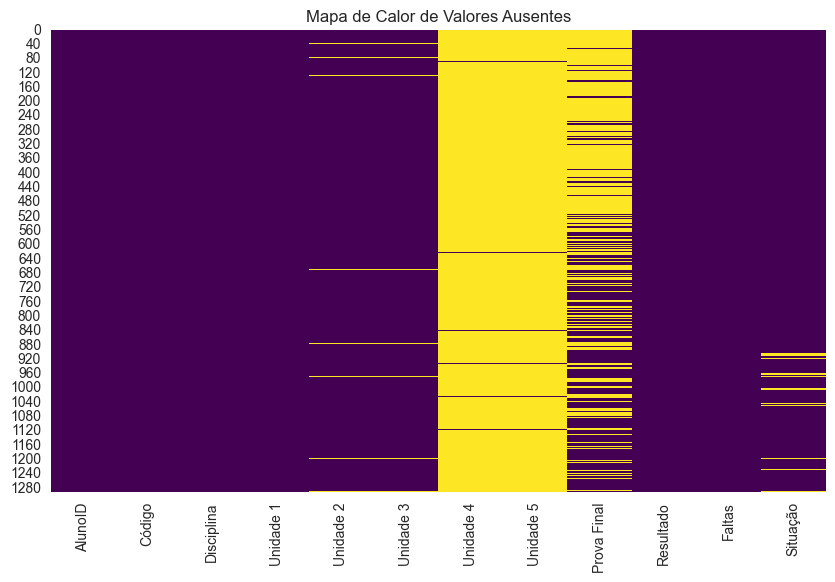


### Resumo de Colunas com Valores Ausentes:


,Total Ausentes,Porcentagem (%)
Unidade 5,1274,98.683191
Unidade 4,1274,98.683191
Prova Final,732,56.700232
Situação,40,3.098373
Unidade 3,27,2.091402
Unidade 2,27,2.091402


In [7]:
if not df.empty:
    print("### Contagem de valores ausentes por coluna:")
    missing_values = df.isnull().sum()
    print(missing_values)

    print("\n### Porcentagem de valores ausentes por coluna:")
    missing_percentage = (df.isnull().sum() / len(df)) * 100
    print(missing_percentage.round(2))

    # Visualização de valores ausentes
    if missing_values.sum() > 0:
        plt.figure(figsize=(10, 6))
        sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
        plt.title('Mapa de Calor de Valores Ausentes')
        plt.show()

        missing_data = pd.DataFrame({'Total Ausentes': missing_values, 'Porcentagem (%)': missing_percentage})
        missing_data = missing_data[missing_data['Total Ausentes'] > 0].sort_values(by='Porcentagem (%)', ascending=False)
        if not missing_data.empty:
            print("\n### Resumo de Colunas com Valores Ausentes:")
            display(missing_data)
        else:
            print("Não há valores ausentes no dataset.")
    else:
        print("\nNão há valores ausentes no dataset.")

### 3.2. Valores Duplicados
Linhas duplicadas podem levar a análises enviesadas. Vamos verificar se existem registros idênticos.


In [8]:
if not df.empty:
    duplicates = df.duplicated().sum()
    print(f"Número de linhas duplicadas: {duplicates}")

    if duplicates > 0:
        print("\nExemplo de linhas duplicadas:")
        display(df[df.duplicated(keep=False)].sort_values(by=df.columns.tolist()))
        print("Recomenda-se remover duplicatas para evitar viés na análise.")
    else:
        print("Não há linhas duplicadas no dataset.")

Número de linhas duplicadas: 0
Não há linhas duplicadas no dataset.


### 3.3. Consistência e Unicidade (Valores Únicos)
Para colunas categóricas ou de identificação, a unicidade e consistência dos valores são importantes. Isso ajuda a identificar erros de digitação ou variações que deveriam ser um único valor.


In [9]:
if not df.empty:
    print("### Número de valores únicos por coluna e exemplos:")
    for col in df.columns:
        unique_count = df[col].nunique()
        print(f"- Coluna '{col}': {unique_count} valores únicos")
        if unique_count < 20 and df[col].dtype == 'object': # Para colunas categóricas com poucos valores
            print(f"  Valores únicos: {df[col].unique()}")
        elif unique_count < 20 and (df[col].dtype == 'int64' or df[col].dtype == 'float64'): # Para colunas numéricas discretas
             print(f"  Valores únicos: {df[col].unique()}")
        elif unique_count > 20 and df[col].dtype == 'object':
             print(f"  Primeiros 10 valores únicos: {df[col].unique()[:10]}...")
        print("\n")

    # Exemplo específico para uma coluna 'Aluno_ID' (se existir)
    if 'Aluno_ID' in df.columns:
        if df['Aluno_ID'].nunique() != len(df):
            print("ATENÇÃO: A coluna 'Aluno_ID' não possui valores únicos para todos os registros. Isso pode indicar alunos duplicados ou IDs inconsistentes.")
        else:
            print("A coluna 'Aluno_ID' possui valores únicos para todos os registros, o que é esperado para um identificador.")

### Número de valores únicos por coluna e exemplos:
- Coluna 'AlunoID': 41 valores únicos
  Primeiros 10 valores únicos: ['1' '2' '3' '4' '5' '6' '7' '8' '9' '10']...


- Coluna 'Código': 75 valores únicos
  Primeiros 10 valores únicos: ['DC/CCN061' 'DC/CCN040' 'DC/CCN038' 'DC/CCN071' 'DC/CCN032' 'DC/CCN033'
 'DC/CCN067' 'DFIS/CCN020' 'DC/CCN044' 'DC/CCN041']...


- Coluna 'Disciplina': 58 valores únicos
  Primeiros 10 valores únicos: ['PROCESSAMENTO DE LINGUAGEM NATURAL' 'SEGURANÇA EM SISTEMAS'
 'SISTEMAS DISTRIBUÍDOS' 'TÓPICOS EM ENGENHARIA DE SOFTWARE'
 'COMPUTAÇÃO GRÁFICA' 'SISTEMAS OPERACIONAIS' 'TÓPICOS EM BIOINFORMÁTICA'
 'ELETRICIDADE E MAGNETISMO' 'ENGENHARIA DE SOFTWARE II'
 'INTELIGÊNCIA ARTIFICIAL']...


- Coluna 'Unidade 1': 102 valores únicos
  Primeiros 10 valores únicos: ['7,1' '9,3' '8,0' '9,4' '4,0' '6,0' '9,5' '8,9' '8,2' '10,0']...


- Coluna 'Unidade 2': 102 valores únicos
  Primeiros 10 valores únicos: ['9,4' '8,5' '10,0' '9,0' '7,0' '9,5' '6,4' '6,0' '8,0' '8,3']

### 3.4. Tipos de Dados
Verificar se os tipos de dados inferidos estão corretos é fundamental para operações e cálculos adequados.


In [14]:
if not df.empty:
    print("### Tipos de dados de cada coluna antes da conversão:")
    display(df.dtypes)

    print("\nVerificando e ajustando os tipos de dados para as colunas específicas...")

    # Lista de colunas que devem ser float
    float_cols = ['Unidade 1', 'Unidade 2', 'Unidade 3', 'Unidade 4', 'Unidade 5', 'Prova Final', 'Resultado']
    # Lista de colunas que devem ser int (agora inclui 'ID_Aluno' e 'Faltas')
    int_cols = ['AlunoID', 'Faltas']

    # Converter colunas para float
    for col in float_cols:
        if col in df.columns:
            try:
                # errors='coerce' converterá valores não numéricos em NaN (Not a Number)
                df[col] = pd.to_numeric(df[col], errors='coerce')
                print(f"Coluna '{col}' convertida para float.")
            except Exception as e:
                print(f"Erro ao converter a coluna '{col}' para float: {e}")
        else:
            print(f"Aviso: Coluna '{col}' não encontrada no DataFrame para conversão para float.")

    # Converter colunas para int
    for col in int_cols:
        if col in df.columns:
            try:
                # Primeiro, converte para float para lidar com NaN se houver, depois para pd.Int64Dtype()
                # pd.Int64Dtype() é o tipo inteiro do Pandas que suporta NaNs
                df[col] = pd.to_numeric(df[col], errors='coerce').astype(pd.Int64Dtype())
                print(f"Coluna '{col}' convertida para inteiro.")
            except Exception as e:
                print(f"Erro ao converter a coluna '{col}' para inteiro: {e}")
        else:
            print(f"Aviso: Coluna '{col}' não encontrada no DataFrame para conversão para inteiro.")

    # As demais colunas que não foram explicitamente convertidas manterão seus tipos originais
    # ou serão 'object' se contiverem strings misturadas.
    # Se você quiser forçar alguma coluna específica para string (object), pode fazer assim:
    # if 'Nome_do_Aluno' in df.columns:
    #     df['Nome_do_Aluno'] = df['Nome_do_Aluno'].astype(str)
    # print("Exemplo: Coluna 'Nome_do_Aluno' (se existir) convertida para string.")


    print("\n### Tipos de dados de cada coluna após a conversão:")
    display(df.dtypes)

### Tipos de dados de cada coluna antes da conversão:


AlunoID         object
Código          object
Disciplina      object
Unidade 1      float64
Unidade 2      float64
Unidade 3      float64
Unidade 4      float64
Unidade 5      float64
Prova Final    float64
Resultado      float64
Faltas           Int64
Situação        object
dtype: object


Verificando e ajustando os tipos de dados para as colunas específicas...
Coluna 'Unidade 1' convertida para float.
Coluna 'Unidade 2' convertida para float.
Coluna 'Unidade 3' convertida para float.
Coluna 'Unidade 4' convertida para float.
Coluna 'Unidade 5' convertida para float.
Coluna 'Prova Final' convertida para float.
Coluna 'Resultado' convertida para float.
Coluna 'AlunoID' convertida para inteiro.
Coluna 'Faltas' convertida para inteiro.

### Tipos de dados de cada coluna após a conversão:


AlunoID          Int64
Código          object
Disciplina      object
Unidade 1      float64
Unidade 2      float64
Unidade 3      float64
Unidade 4      float64
Unidade 5      float64
Prova Final    float64
Resultado      float64
Faltas           Int64
Situação        object
dtype: object

### 3.5. Outliers (Valores Atípicos)
Outliers são valores que se desviam significativamente da maioria e podem ser erros de entrada de dados ou eventos raros. É importante identificá-los, especialmente em colunas de notas, onde valores muito abaixo de 0 ou muito acima de 10 (ou a escala máxima) seriam anômalos.


### Detecção de Outliers em Colunas Numéricas (Notas)

Colunas numéricas consideradas para análise de outliers: ['Unidade 1', 'Unidade 2', 'Unidade 3', 'Unidade 4', 'Unidade 5', 'Prova Final', 'Resultado']


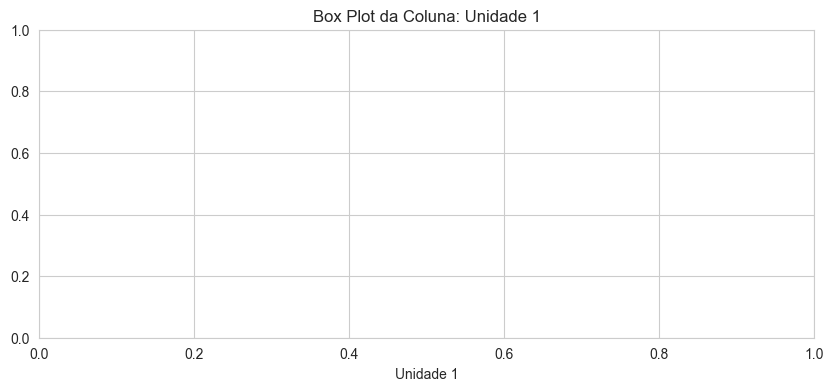

--- Estatísticas IQR para a coluna 'Unidade 1':
  Q1: nan
  Q3: nan
  IQR: nan
  Limite Inferior (Q1 - 1.5*IQR): nan
  Limite Superior (Q3 + 1.5*IQR): nan

--- Não foram detectados outliers na coluna 'Unidade 1' usando o método IQR.

--------------------------------------------------



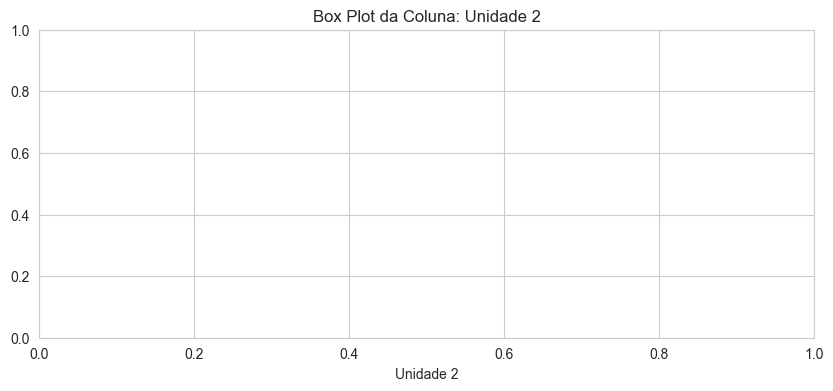

--- Estatísticas IQR para a coluna 'Unidade 2':
  Q1: nan
  Q3: nan
  IQR: nan
  Limite Inferior (Q1 - 1.5*IQR): nan
  Limite Superior (Q3 + 1.5*IQR): nan

--- Não foram detectados outliers na coluna 'Unidade 2' usando o método IQR.

--------------------------------------------------



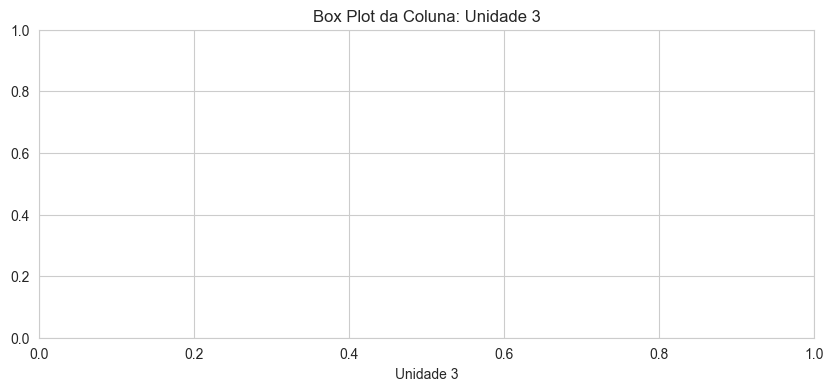

--- Estatísticas IQR para a coluna 'Unidade 3':
  Q1: nan
  Q3: nan
  IQR: nan
  Limite Inferior (Q1 - 1.5*IQR): nan
  Limite Superior (Q3 + 1.5*IQR): nan

--- Não foram detectados outliers na coluna 'Unidade 3' usando o método IQR.

--------------------------------------------------



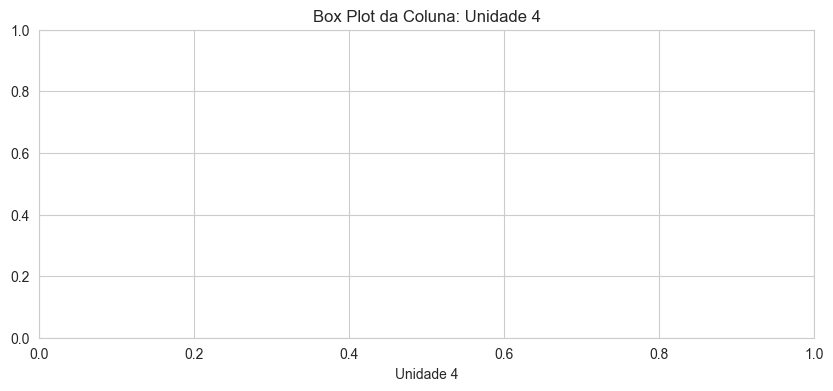

--- Estatísticas IQR para a coluna 'Unidade 4':
  Q1: nan
  Q3: nan
  IQR: nan
  Limite Inferior (Q1 - 1.5*IQR): nan
  Limite Superior (Q3 + 1.5*IQR): nan

--- Não foram detectados outliers na coluna 'Unidade 4' usando o método IQR.

--------------------------------------------------



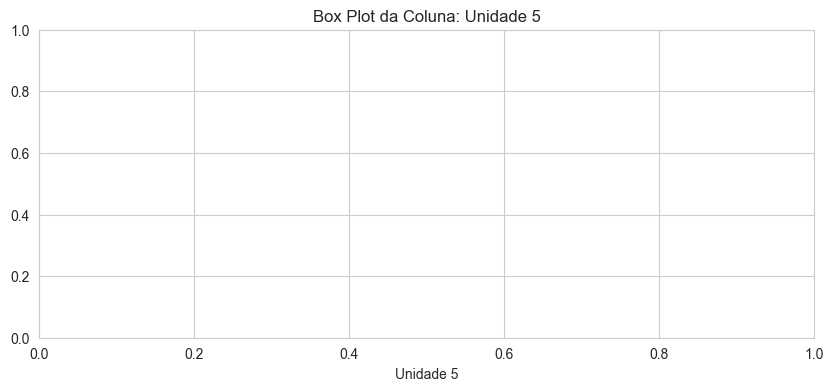

--- Estatísticas IQR para a coluna 'Unidade 5':
  Q1: nan
  Q3: nan
  IQR: nan
  Limite Inferior (Q1 - 1.5*IQR): nan
  Limite Superior (Q3 + 1.5*IQR): nan

--- Não foram detectados outliers na coluna 'Unidade 5' usando o método IQR.

--------------------------------------------------



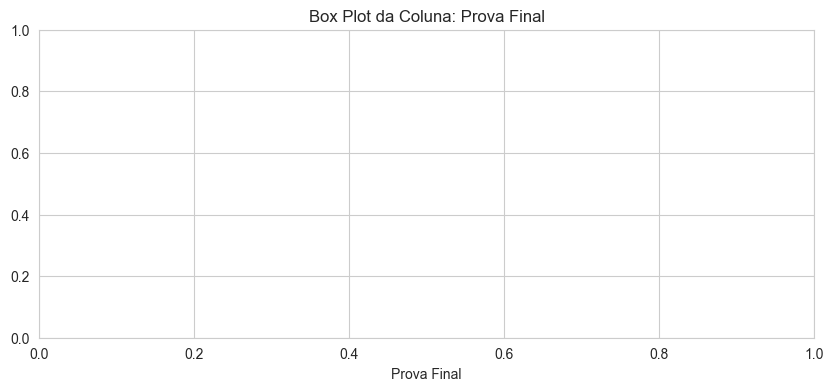

--- Estatísticas IQR para a coluna 'Prova Final':
  Q1: nan
  Q3: nan
  IQR: nan
  Limite Inferior (Q1 - 1.5*IQR): nan
  Limite Superior (Q3 + 1.5*IQR): nan

--- Não foram detectados outliers na coluna 'Prova Final' usando o método IQR.

--------------------------------------------------



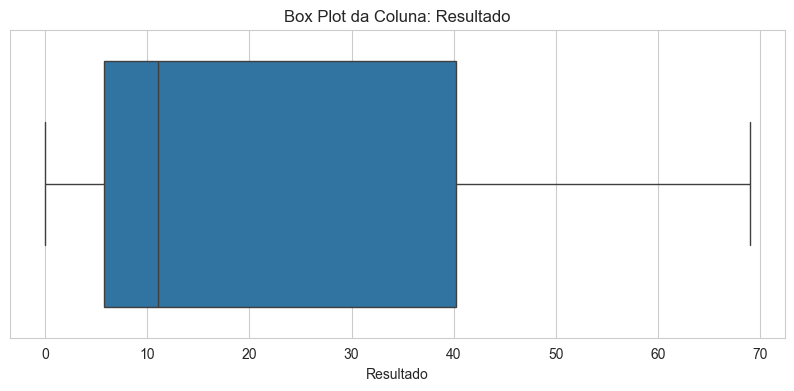

--- Estatísticas IQR para a coluna 'Resultado':
  Q1: 5.75
  Q3: 40.25
  IQR: 34.50
  Limite Inferior (Q1 - 1.5*IQR): -46.00
  Limite Superior (Q3 + 1.5*IQR): 92.00

--- Não foram detectados outliers na coluna 'Resultado' usando o método IQR.

--------------------------------------------------

Considere a escala das notas (ex: 0-10 ou 0-100). Valores fora dessa faixa são anômalos.


In [17]:
if not df.empty:
    print("### Detecção de Outliers em Colunas Numéricas (Notas)")

    numeric_cols_for_outliers = df.select_dtypes(include=np.number).columns.tolist()

    # Remover 'AlunoID' e 'Faltas' da lista para análise de outliers
    # pois não são colunas de notas e não se aplicam os mesmos critérios de outlier
    cols_to_exclude = ['AlunoID', 'Faltas']
    for col_to_exclude in cols_to_exclude:
        if col_to_exclude in numeric_cols_for_outliers:
            numeric_cols_for_outliers.remove(col_to_exclude)

    print(f"\nColunas numéricas consideradas para análise de outliers: {numeric_cols_for_outliers}")

    if not numeric_cols_for_outliers:
        print("Não há colunas numéricas para analisar outliers (exceto as excluídas como AlunoID e Faltas).")
    else:
        for col in numeric_cols_for_outliers:
            # Focar em colunas que representam notas/resultados
            # 'unidade', 'prova', 'resultado' são as palavras-chave para identificar essas colunas
            if any(keyword in col.lower() for keyword in ['unidade', 'prova', 'resultado']):
                plt.figure(figsize=(10, 4))
                # Usar .dropna() no boxplot para ignorar valores NaN, que são comuns em notas (ex: Unidade 4, Unidade 5)
                sns.boxplot(x=df[col].dropna())
                plt.title(f'Box Plot da Coluna: {col}')
                plt.xlabel(col)
                plt.show()

                Q1 = df[col].quantile(0.25)
                Q3 = df[col].quantile(0.75)
                IQR = Q3 - Q1
                lower_bound = Q1 - 1.5 * IQR
                upper_bound = Q3 + 1.5 * IQR

                print(f"--- Estatísticas IQR para a coluna '{col}':")
                print(f"  Q1: {Q1:.2f}")
                print(f"  Q3: {Q3:.2f}")
                print(f"  IQR: {IQR:.2f}")
                print(f"  Limite Inferior (Q1 - 1.5*IQR): {lower_bound:.2f}")
                print(f"  Limite Superior (Q3 + 1.5*IQR): {upper_bound:.2f}")

                # Filtrar outliers
                outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

                if not outliers.empty:
                    print(f"\n--- Outliers na coluna '{col}':")
                    # Usar .to_string() para exibir o DataFrame de outliers de forma legível no console
                    # Verificar se 'AlunoID' está presente para exibir junto com o outlier
                    if 'AlunoID' in df.columns:
                        print(outliers[['AlunoID', col]].to_string())
                    else:
                        print(outliers[[col]].head().to_string()) # Apenas as primeiras se 'AlunoID' não existir
                    print(f"  Total de outliers encontrados: {len(outliers)}")
                else:
                    print(f"\n--- Não foram detectados outliers na coluna '{col}' usando o método IQR.")
                print("\n" + "-"*50 + "\n")

        print("Considere a escala das notas (ex: 0-10 ou 0-100). Valores fora dessa faixa são anômalos.")